In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torchvision.transforms import v2
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory
import utils


plt.ion()   # interactive mode

In [2]:
cudnn.enabled = True

In [3]:
cudnn.benchmark = True

In [4]:
device=torch.device('cuda')
print(f"Using {device} device")

Using cuda device


In [5]:
transforms = {
    'train': v2.Compose([
        #v2.AutoAugment(),
        v2.Resize(232),
        v2.CenterCrop(224),
        v2.PILToTensor(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        #v2.RandomErasing(p=0.2)
    ]),
    'val': v2.Compose([
        #v2.AutoAugment(),
        v2.Resize(232),
        v2.CenterCrop(224),
        v2.PILToTensor(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        #v2.RandomErasing(p=0.2)
    ]),
}

In [6]:
data_="data"

In [7]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_, x),transforms[x]) for x in ['train', 'val']}

In [8]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,shuffle=True, num_workers=4)for x in ['train', 'val']}

In [9]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

In [10]:
class_names = image_datasets['train'].classes

In [11]:
model_ft=torch.load('models/mobilenet1.pt')
checkpoint = torch.load('models/mobilenet_.pth', weights_only=True)
model_ft.load_state_dict(checkpoint['model_state_dict'])

C:\Users\arinz\AppData\Local\Temp\ipykernel_4776\2754962367.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_ft=torch.load('models/mobilenet1.pt')


<All keys matched successfully>

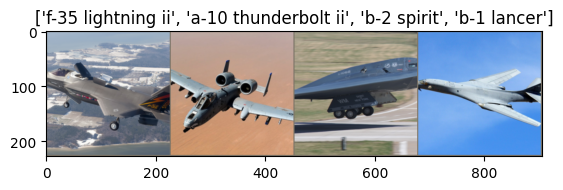

In [12]:
# test
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [13]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [14]:
model_ft = model_ft.to(device)

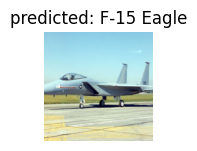

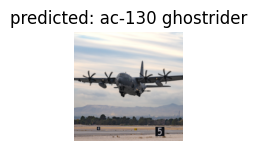

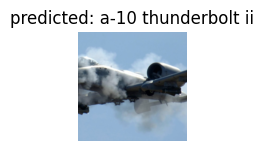

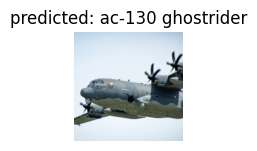

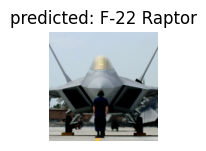

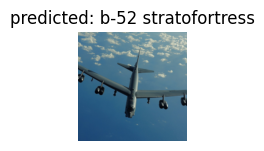

In [17]:
visualize_model(model_ft)